In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler

from warnings import filterwarnings
filterwarnings('ignore')

In [48]:
df=pd.read_csv('Life Expectancy Data.csv')
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [49]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

|Feature | Description
|------|------------
|**Country** | countries has been collected from the same WHO data repository website 
|**Year**|year 2013-2000
|**Status**|Status of country **Developing** or **Developed**
|**Life expectancy**|Life Expectancy in age **our target**
|**Adult Mortality**|Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
|**infant deaths**|Number of Infant Deaths per 1000 population
|**Alcohol**|Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
|**percentage expenditure**|Expenditure on health as a percentage of Gross Domestic Product per capita(%)
|**Hepatitis B**|Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
|**Measles**|Measles - number of reported cases per 1000 population
|**BMI**|Average Body Mass Index of entire population
|**under-five deaths**|Number of under-five deaths per 1000 population
|**Polio**|Polio (Pol3) immunization coverage among 1-year-olds (%)
|**Total expenditure**|General government expenditure on health as a percentage of total government expenditure (%)
|**Diphtheria**|Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
|**HIV/AIDS**|Deaths per 1 000 live births HIV/AIDS (0-4 years)
|**GDP**|Gross Domestic Product per capita (in USD)
|**Population**|Population of the country
|**thinness  1-19 years**|Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
|**thinness 5-9 years**|Prevalence of thinness among children for Age 5 to 9(%)
|**Income composition of resources**|Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
|**Schooling**|Number of years of Schooling(years)

# **<font >DataFrame Shape</font>**

In [50]:
#print number of rows and columns in the dataset

print("Number of Rows:",df.shape[0])
print("Number of Features:",df.shape[1])

Number of Rows: 2938
Number of Features: 22


# **<font>DataFrame Info</font>**

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [52]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

# **<font >Statistical Info</font>**

In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
Adult Mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


In [54]:
cols = df.select_dtypes(include=['float64', 'int64']).columns

for i in cols:
    print(i, df[i].value_counts())
    print('-----------------------------------')

Year Year
2013    193
2015    183
2014    183
2012    183
2011    183
2010    183
2009    183
2008    183
2007    183
2006    183
2005    183
2004    183
2003    183
2002    183
2001    183
2000    183
Name: count, dtype: int64
-----------------------------------
Life expectancy  Life expectancy 
73.0    45
75.0    33
78.0    31
73.6    28
73.9    25
        ..
83.4     1
83.2     1
48.8     1
43.8     1
45.4     1
Name: count, Length: 362, dtype: int64
-----------------------------------
Adult Mortality Adult Mortality
12.0     34
14.0     30
16.0     29
138.0    25
11.0     25
         ..
717.0     1
723.0     1
715.0     1
686.0     1
665.0     1
Name: count, Length: 425, dtype: int64
-----------------------------------
infant deaths infant deaths
0      848
1      342
2      203
3      175
4       96
      ... 
89       1
91       1
100      1
106      1
110      1
Name: count, Length: 209, dtype: int64
-----------------------------------
Alcohol Alcohol
0.01    288
0.03     15
0.0

# **<font>Exploring Categorical Features</font>**

#### **<font >Country</font>**

In [55]:
df['Country'].value_counts()

Country
Afghanistan              16
Albania                  16
Algeria                  16
Angola                   16
Antigua and Barbuda      16
                         ..
Monaco                    1
Marshall Islands          1
Saint Kitts and Nevis     1
San Marino                1
Tuvalu                    1
Name: count, Length: 193, dtype: int64

#### **<font>Status</font>**

In [56]:
df['Status'].value_counts()

Status
Developing    2426
Developed      512
Name: count, dtype: int64

# **<font>Handling Missing Values</font>**


In [57]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [58]:
columns_to_fill = [
    'Life expectancy ', 'Adult Mortality', ' BMI ', 'Polio', 'Diphtheria ',
    ' thinness  1-19 years', ' thinness 5-9 years', 'Alcohol', 'Hepatitis B',
    'Total expenditure', 'GDP', 'Population', 'Income composition of resources', 'Schooling'
]

for col in columns_to_fill:
    df[col] = df[col].fillna(df[col].mean())


In [59]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

# **<font>Handling Outliers</font>**



In [60]:
columns = [
    'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
    'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
    'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
    ' thinness 5-9 years', 'Income composition of resources', 'Schooling'
]

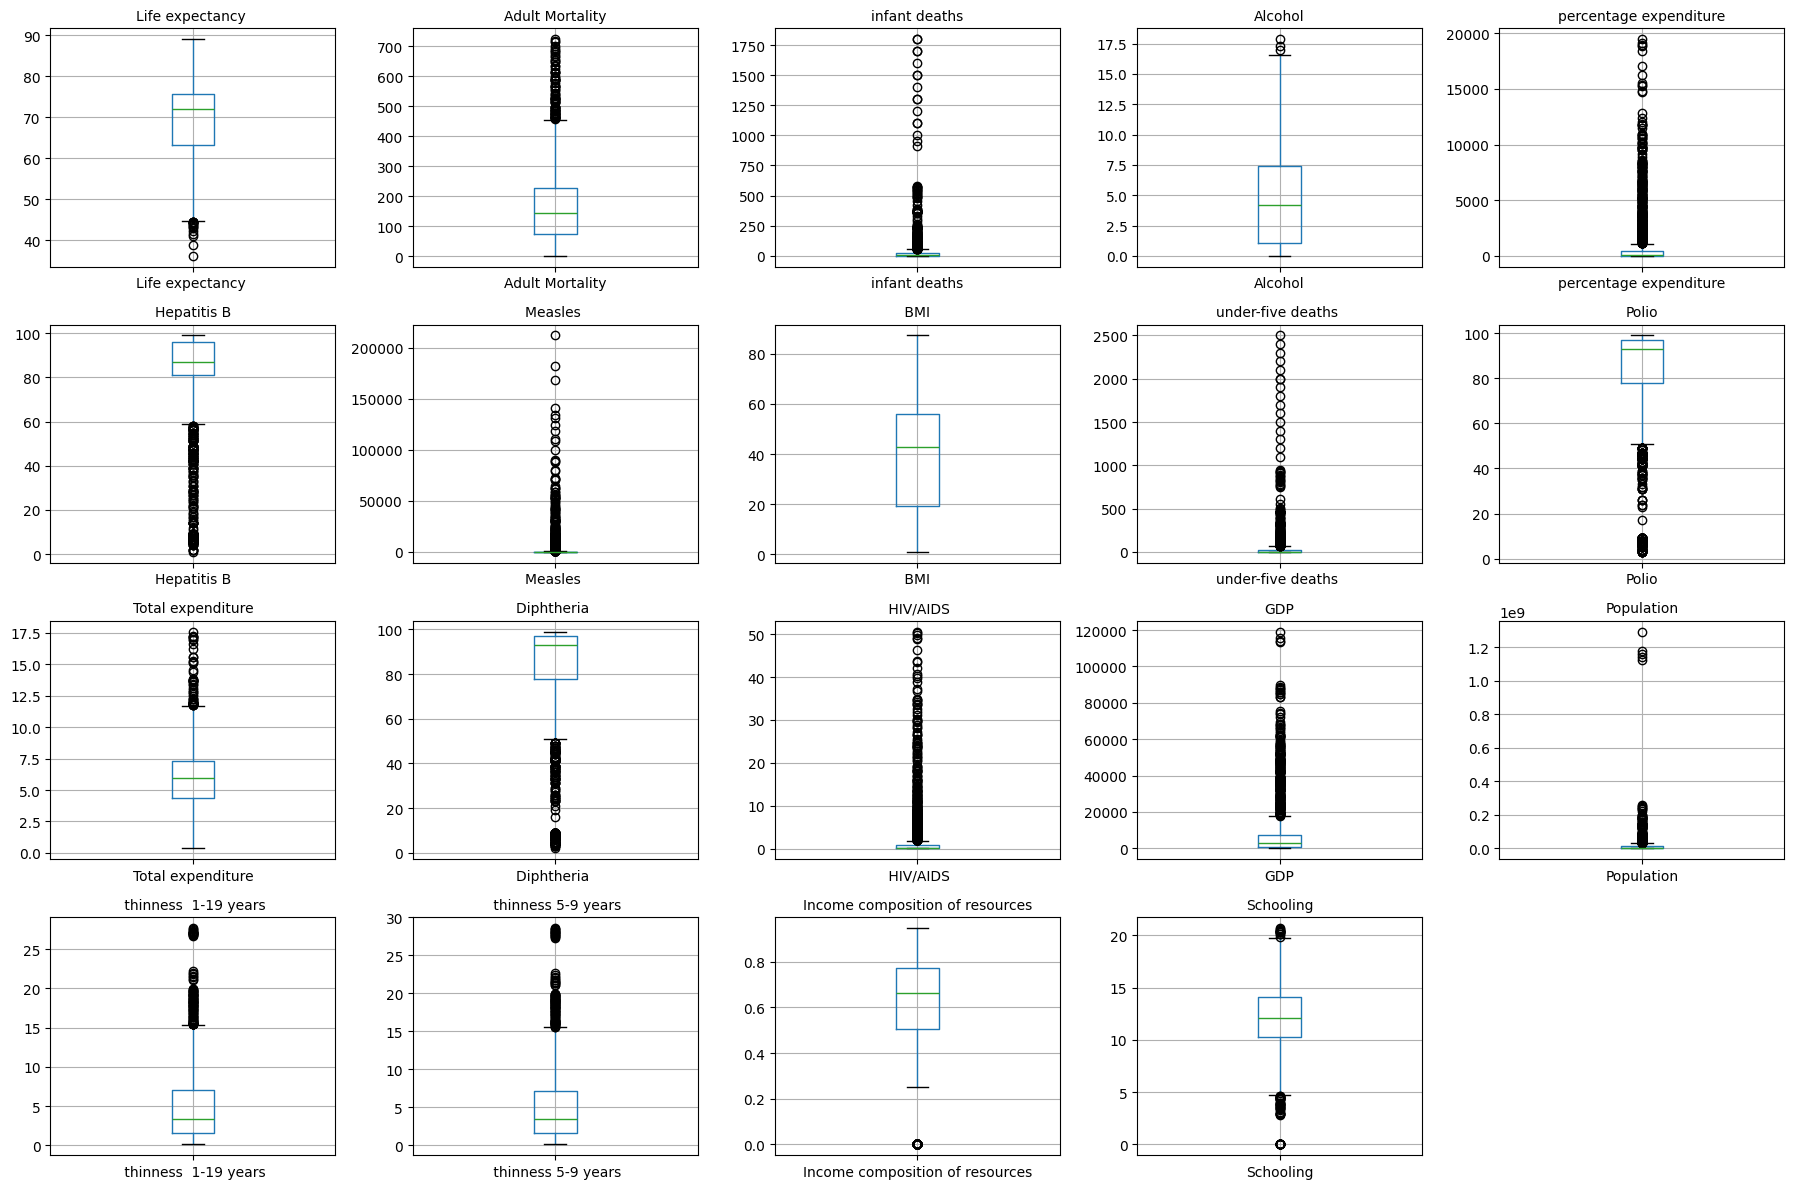

In [61]:
plt.figure(figsize=(18, 12))


for i, column in enumerate(columns, start=1):
    plt.subplot(4, 5, i)  # 4 rows, 5 columns (adjust for better layout)
    df.boxplot(column)
    plt.title(column, fontsize=10)

plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

#### **<font>dealing with outliers</font>**

In [62]:
# Specify the list of columns you want to handle outliers for
cols_to_handle_outliers = [
    'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
    'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
    'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
    ' thinness  1-19 years', ' thinness 5-9 years',
    'Income composition of resources', 'Schooling'
]

# Perform outlier handling for each specified column
for col_name in cols_to_handle_outliers:
    # Calculate quartiles and IQR
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1

    # Define the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Replace outliers with the mean value of the column
    df[col_name] = np.where((df[col_name] > upper_bound) | (df[col_name] < lower_bound), np.mean(df[col_name]), df[col_name])


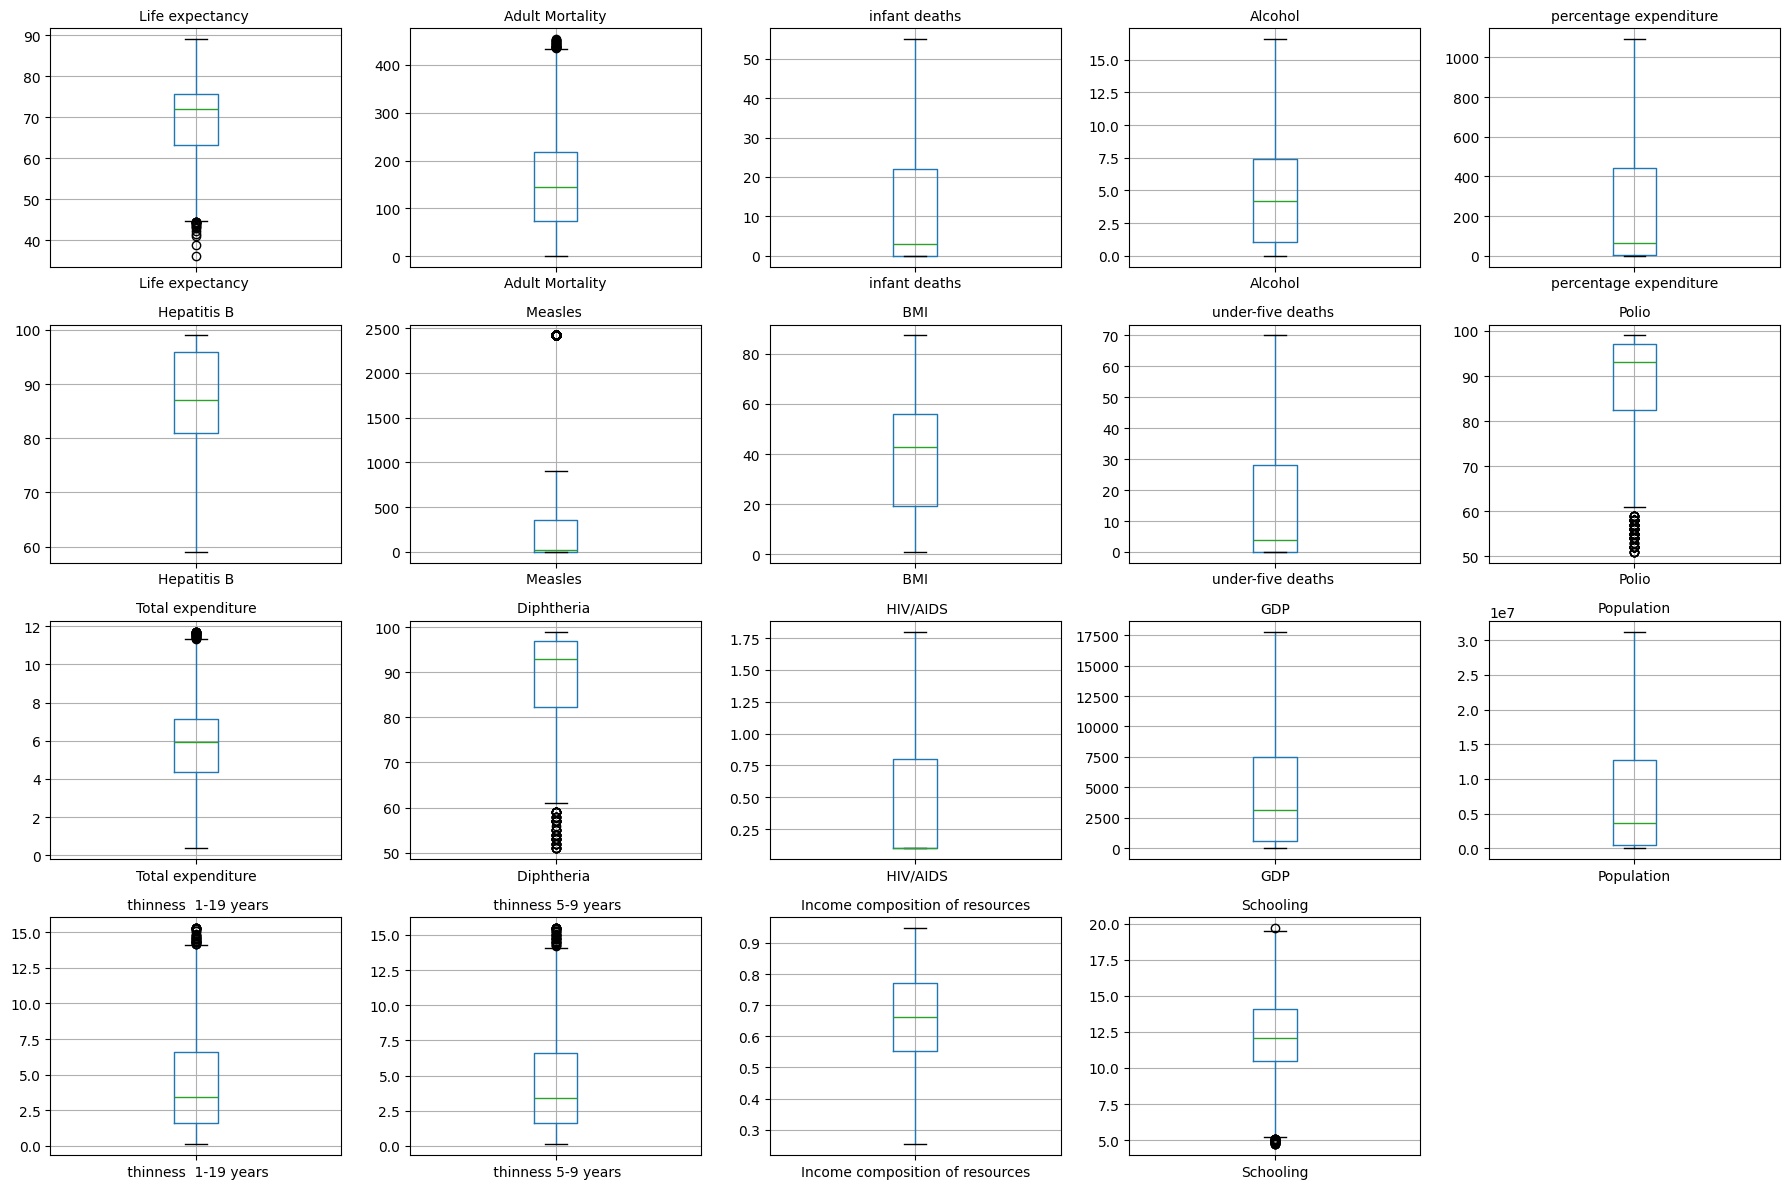

In [63]:
plt.figure(figsize=(18, 12))


for i, column in enumerate(columns, start=1):
    plt.subplot(4, 5, i)  # 4 rows, 5 columns (adjust for better layout)
    df.boxplot(column)
    plt.title(column, fontsize=10)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [89]:
correlation = df.corr()["Life expectancy "].sort_values(ascending=False)

# Display the correlation values
print(correlation)

Life expectancy                    1.000000
Income composition of resources    0.831106
Schooling                          0.720966
 BMI                               0.559255
Polio                              0.550746
Diphtheria                         0.549181
percentage expenditure             0.474888
GDP                                0.417404
Alcohol                            0.392401
Hepatitis B                        0.348036
Total expenditure                  0.229227
Year                               0.169623
Population                        -0.001609
Country                           -0.016745
Measles                           -0.313256
Status                            -0.481962
 thinness 5-9 years               -0.552843
 thinness  1-19 years             -0.558245
infant deaths                     -0.574060
Adult Mortality                   -0.592137
under-five deaths                 -0.599508
 HIV/AIDS                         -0.795788
Name: Life expectancy , dtype: f

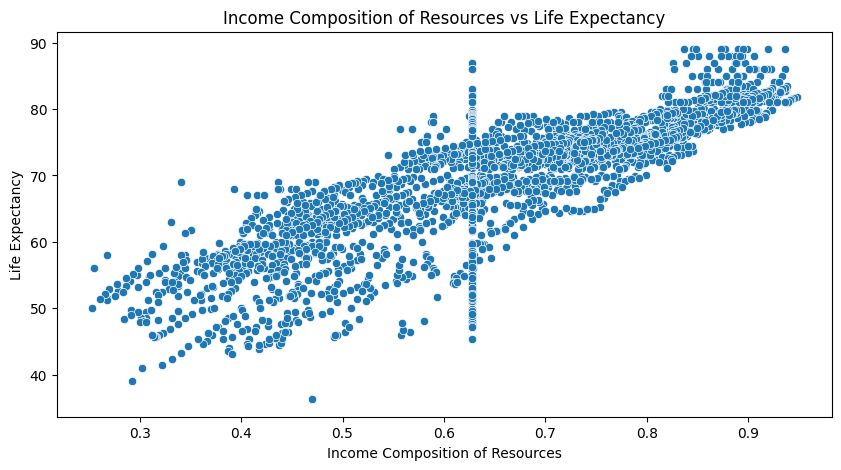

In [90]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Income composition of resources', y='Life expectancy ')
plt.title('Income Composition of Resources vs Life Expectancy')
plt.xlabel('Income Composition of Resources')
plt.ylabel('Life Expectancy')
plt.show()

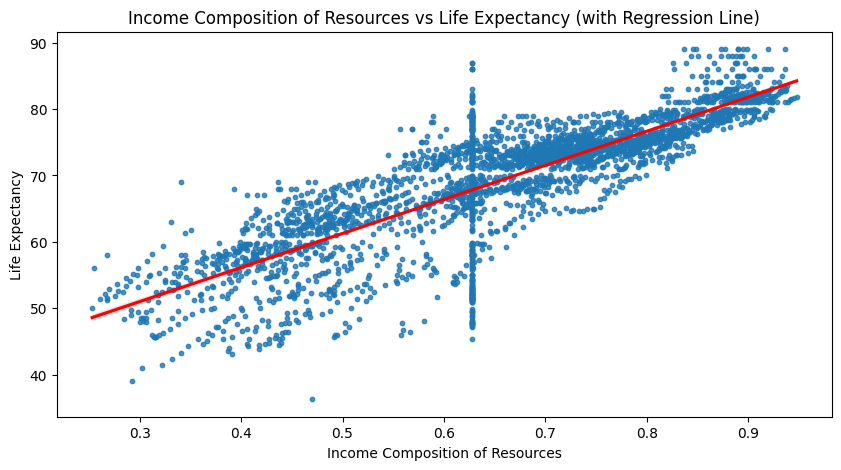

In [91]:
# Regression plot to visualize the trend
plt.figure(figsize=(10, 5))
sns.regplot(data=df, x='Income composition of resources', y='Life expectancy ', scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Income Composition of Resources vs Life Expectancy (with Regression Line)')
plt.xlabel('Income Composition of Resources')
plt.ylabel('Life Expectancy')
plt.show()

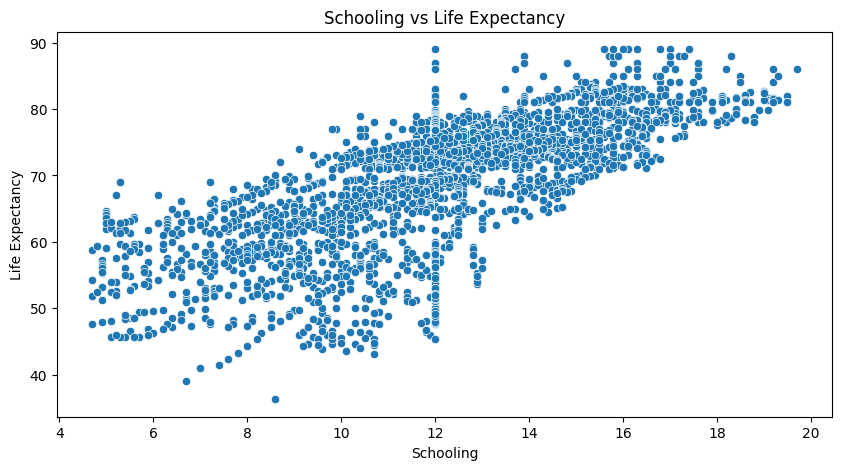

In [92]:
# Scatter plot to visualize the relationship between 'Schooling' and 'Life expectancy'
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Schooling', y='Life expectancy ')
plt.title('Schooling vs Life Expectancy')
plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')
plt.show()

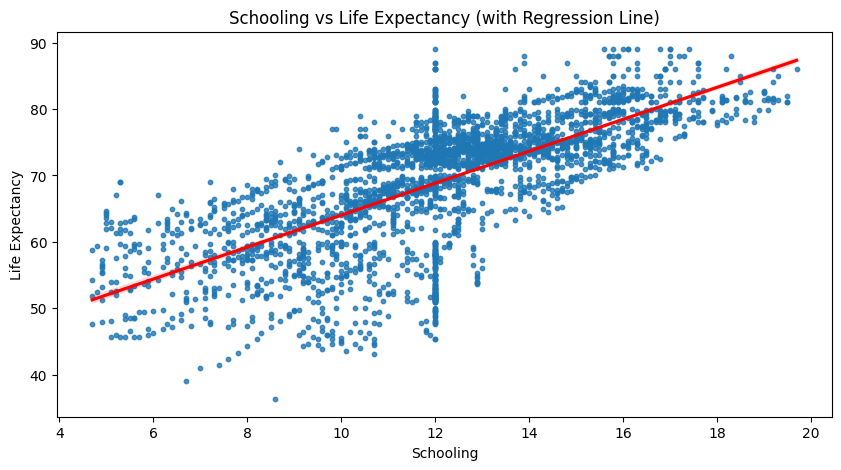

In [93]:
# Regression plot to visualize the trend between 'Schooling' and 'Life expectancy'
plt.figure(figsize=(10, 5))
sns.regplot(data=df, x='Schooling', y='Life expectancy ', scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Schooling vs Life Expectancy (with Regression Line)')
plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')
plt.show()


Top 10 countries with the highest schooling:
Country
120    18.34955
75     18.15625
80     17.65625
125    17.46875
59     17.29375
47     17.19375
119    17.05625
15     16.78750
64     16.60000
5      16.50625
Name: Schooling, dtype: float64

Bottom 10 countries with the lowest schooling:
Country
32     6.087500
31     6.237500
162    6.375000
55     6.386149
127    6.718750
149    7.125000
69     7.175000
106    7.318750
103    7.367849
57     7.786599
Name: Schooling, dtype: float64

Mean Life Expectancy of Top 10 Countries with Highest Schooling: 80.38375
Mean Life Expectancy of Bottom 10 Countries with Lowest Schooling: 58.134375


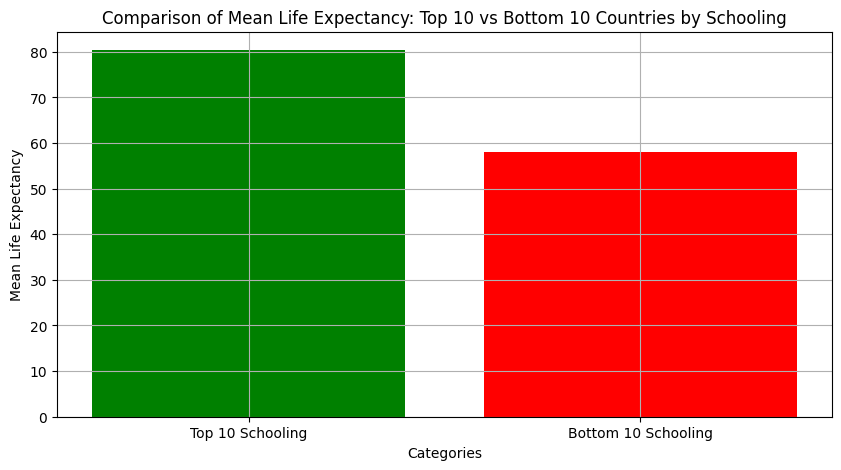

In [94]:
mean_schooling_by_country = df.groupby('Country')['Schooling'].mean()

# Get the top 10 countries with the highest schooling
top_10_schooling_countries = mean_schooling_by_country.nlargest(10)
print("\nTop 10 countries with the highest schooling:")
print(top_10_schooling_countries)

# Get the bottom 10 countries with the lowest schooling
bottom_10_schooling_countries = mean_schooling_by_country.nsmallest(10)
print("\nBottom 10 countries with the lowest schooling:")
print(bottom_10_schooling_countries)

# Calculate the mean life expectancy for the top 10 and bottom 10 countries
mean_life_expectancy_top_10 = df[df['Country'].isin(top_10_schooling_countries.index)]['Life expectancy '].mean()
mean_life_expectancy_bottom_10 = df[df['Country'].isin(bottom_10_schooling_countries.index)]['Life expectancy '].mean()

print(f"\nMean Life Expectancy of Top 10 Countries with Highest Schooling: {mean_life_expectancy_top_10}")
print(f"Mean Life Expectancy of Bottom 10 Countries with Lowest Schooling: {mean_life_expectancy_bottom_10}")

# Plot the comparison
categories = ['Top 10 Schooling', 'Bottom 10 Schooling']
mean_life_expectancies = [mean_life_expectancy_top_10, mean_life_expectancy_bottom_10]

plt.figure(figsize=(10, 5))
plt.bar(categories, mean_life_expectancies, color=['green', 'red'])
plt.xlabel('Categories')
plt.ylabel('Mean Life Expectancy')
plt.title('Comparison of Mean Life Expectancy: Top 10 vs Bottom 10 Countries by Schooling')
plt.grid(True)
plt.show()


Top 10 countries with the highest Income composition of resources:
Country
125    0.931438
7      0.918125
166    0.911062
47     0.899875
119    0.899750
64     0.894500
165    0.893125
30     0.892188
80     0.891500
120    0.891188
Name: Income composition of resources, dtype: float64

Bottom 10 countries with the lowest Income composition of resources:
Country
122    0.298125
26     0.327875
31     0.335500
32     0.355847
114    0.360812
152    0.361812
69     0.364750
103    0.365187
57     0.385347
95     0.389437
Name: Income composition of resources, dtype: float64

Mean Life Expectancy of Top 10 Countries with Highest Income composition of resources: 81.31937500000001
Mean Life Expectancy of Bottom 10 Countries with Lowest Income composition of resources: 53.85125000000001


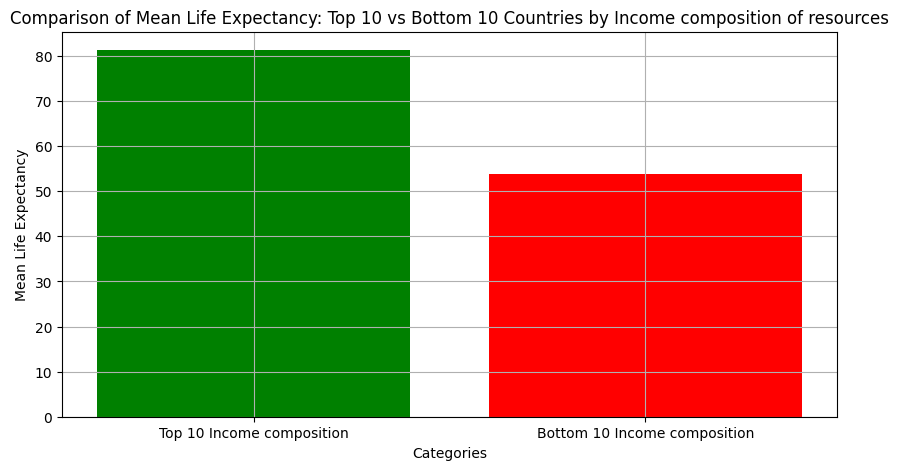

In [95]:
# Calculate the mean value of 'Income composition of resources' for each country
mean_income_by_country = df.groupby('Country')['Income composition of resources'].mean()

# Get the top 10 countries with the highest 'Income composition of resources'
top_10_income_countries = mean_income_by_country.nlargest(10)
print("\nTop 10 countries with the highest Income composition of resources:")
print(top_10_income_countries)

# Get the bottom 10 countries with the lowest 'Income composition of resources'
bottom_10_income_countries = mean_income_by_country.nsmallest(10)
print("\nBottom 10 countries with the lowest Income composition of resources:")
print(bottom_10_income_countries)

# Calculate the mean life expectancy for the top 10 and bottom 10 countries
mean_life_expectancy_top_10_income = df[df['Country'].isin(top_10_income_countries.index)]['Life expectancy '].mean()
mean_life_expectancy_bottom_10_income = df[df['Country'].isin(bottom_10_income_countries.index)]['Life expectancy '].mean()

print(f"\nMean Life Expectancy of Top 10 Countries with Highest Income composition of resources: {mean_life_expectancy_top_10_income}")
print(f"Mean Life Expectancy of Bottom 10 Countries with Lowest Income composition of resources: {mean_life_expectancy_bottom_10_income}")

# Plot the comparison
categories_income = ['Top 10 Income composition', 'Bottom 10 Income composition']
mean_life_expectancies_income = [mean_life_expectancy_top_10_income, mean_life_expectancy_bottom_10_income]

plt.figure(figsize=(10, 5))
plt.bar(categories_income, mean_life_expectancies_income, color=['green', 'red'])
plt.xlabel('Categories')
plt.ylabel('Mean Life Expectancy')
plt.title('Comparison of Mean Life Expectancy: Top 10 vs Bottom 10 Countries by Income composition of resources')
plt.grid(True)
plt.show()


Top 10 countries with the highest Hepatitis B:
Country
110    99.0000
124    99.0000
128    99.0000
58     98.8750
126    98.8125
151    98.6875
154    98.5625
89     98.1875
11     98.1250
1      98.0000
Name: Hepatitis B, dtype: float64

Bottom 10 countries with the lowest Hepatitis B:
Country
0      64.562500
187    65.430058
79     67.992558
146    69.000000
130    69.422615
77     73.562500
103    74.235115
127    74.485115
3      74.911452
158    75.680058
Name: Hepatitis B, dtype: float64

Mean Life Expectancy of Top 10 Countries with Highest Hepatitis B: 73.51456343549538
Mean Life Expectancy of Bottom 10 Countries with Lowest Hepatitis B: 61.733275390993015


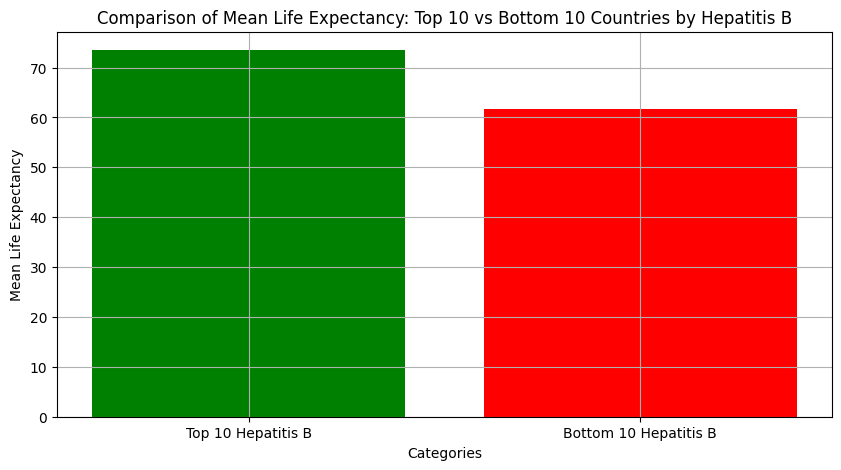


Top 10 countries with the highest Polio:
Country
110    99.0000
124    99.0000
128    99.0000
74     98.9375
41     98.6875
186    98.5625
126    98.5000
151    98.5000
154    98.4375
161    98.3750
Name: Polio, dtype: float64

Bottom 10 countries with the lowest Polio:
Country
72     63.443774
57     65.290660
187    66.187500
69     66.796934
130    67.221887
146    69.000000
76     69.625000
0      70.143821
179    70.159387
95     70.512547
Name: Polio, dtype: float64

Mean Life Expectancy of Top 10 Countries with Highest Polio: 73.48586778332145
Mean Life Expectancy of Bottom 10 Countries with Lowest Polio: 60.60499952892406


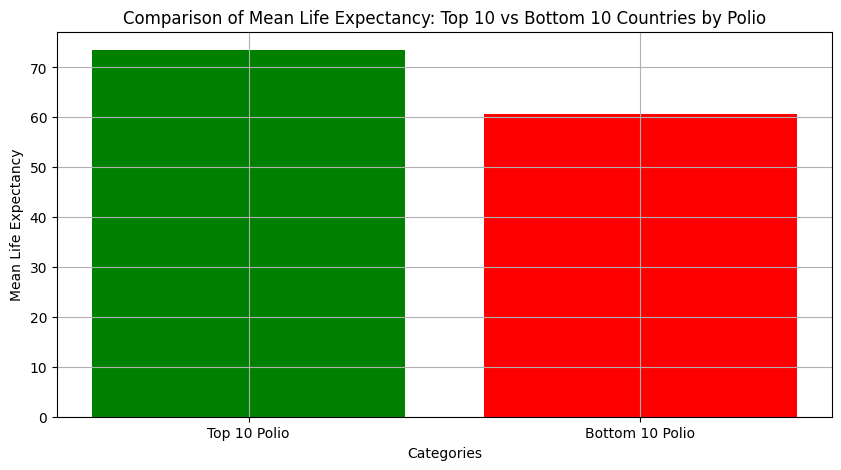

In [96]:
# Function to calculate and plot mean life expectancy for top 10 and bottom 10 countries based on a given feature
def compare_life_expectancy(feature):
    # Calculate the mean value of the feature for each country
    mean_feature_by_country = df.groupby('Country')[feature].mean()

    # Get the top 10 countries with the highest values of the feature
    top_10_countries = mean_feature_by_country.nlargest(10)
    print(f"\nTop 10 countries with the highest {feature}:")
    print(top_10_countries)

    # Get the bottom 10 countries with the lowest values of the feature
    bottom_10_countries = mean_feature_by_country.nsmallest(10)
    print(f"\nBottom 10 countries with the lowest {feature}:")
    print(bottom_10_countries)

    # Calculate the mean life expectancy for the top 10 and bottom 10 countries
    mean_life_expectancy_top_10 = df[df['Country'].isin(top_10_countries.index)]['Life expectancy '].mean()
    mean_life_expectancy_bottom_10 = df[df['Country'].isin(bottom_10_countries.index)]['Life expectancy '].mean()

    print(f"\nMean Life Expectancy of Top 10 Countries with Highest {feature}: {mean_life_expectancy_top_10}")
    print(f"Mean Life Expectancy of Bottom 10 Countries with Lowest {feature}: {mean_life_expectancy_bottom_10}")

    # Plot the comparison
    categories = [f'Top 10 {feature}', f'Bottom 10 {feature}']
    mean_life_expectancies = [mean_life_expectancy_top_10, mean_life_expectancy_bottom_10]

    plt.figure(figsize=(10, 5))
    plt.bar(categories, mean_life_expectancies, color=['green', 'red'])
    plt.xlabel('Categories')
    plt.ylabel('Mean Life Expectancy')
    plt.title(f'Comparison of Mean Life Expectancy: Top 10 vs Bottom 10 Countries by {feature}')
    plt.grid(True)
    plt.show()

# Compare life expectancy based on 'Hepatitis B'
compare_life_expectancy('Hepatitis B')

# Compare life expectancy based on 'Polio'
compare_life_expectancy('Polio')

In [64]:
#using plotly draw line plot to show the trend of life expectancy over the years
fig = px.line(df.sort_values(by='Year'), x='Year', y='Life expectancy ',animation_frame='Country',animation_group='Year',color='Country',template='plotly_dark', title='Trend of Life Expectancy Over the Years')

#update layout to center the title and make it bold
fig.update_layout(
    title=dict(text='<b>Trend of Life Expectancy Over the Years</b>', x=0.5)
)

fig.show()

**Most of the data was collected in 2013**

### **<font >Developing</font>**

In [66]:
# Filter DataFrame for 'Developing' status
developing_df = df[df['Status'] == 'Developing']

# Create a histogram 
fig = px.histogram(developing_df, x='Life expectancy ', title="Life Expectancy of Developing Nations")
fig.update_layout(
    xaxis_title='',
    yaxis_title='Count of Ages',
    title_text='<b>Life Expectancy of Developing Countries</b>',
    title_x=0.5,  # Center title
)
fig.show()

> **We can say the range is from like 41 to 90 in Developing Countries**

### **<font >Developed</font>**

In [67]:
# Filter DataFrame for 'Developing' status
developing_df = df[df['Status'] == 'Developed']

# Create a histogram 
fig = px.histogram(developing_df, x='Life expectancy ', title="Life Expectancy of Developing Nations")
fig.update_layout(
    xaxis_title='',
    yaxis_title='Count of Ages',
    title_text='<b>Life Expectancy of Developed Countries</b>',
    title_x=0.5,  # Center title
)
fig.show()

> **We can say the range is from like 70 to 90 in Developed Countries**

In [68]:
#using plotly to visualize Average Adult Mortality of Developing and Developed Countries
fig = px.bar(df.groupby('Status', as_index=False).agg({'Adult Mortality':'mean'}), 
             x='Status', 
             y='Adult Mortality', 
             color='Status',
             title='Average Adult Mortality of Developing and Developed Countries')

# Update layout to center the title
fig.update_layout(title_text='<b>Average Adult Mortality of Developing and Developed Countries</b>', title_x=0.5)

# Show the plot
fig.show()  

In [69]:
#using plotly to visualize Average Infant deaths of Developing and Developed Countries
fig = px.bar(df.groupby('Status', as_index=False).agg({'infant deaths':'mean'}), 
             x='Status', 
             y='infant deaths', 
             color='Status',
             title='Average Infant deaths of Developing and Developed Countries')

# Update layout to center the title
fig.update_layout(title_text='<b>Average Infant deaths of Developing and Developed Countries</b>', title_x=0.5)

# Show the plot
fig.show()  

> **Developing Countries have highest Adult Mortality and Infant deaths**

In [71]:
#using plotly to visualize scatter ploy of Life expectancy vs Adult Mortality for countries over years
fig = px.scatter(df.sort_values(by='Year'), x='Life expectancy ', y='Adult Mortality',color='Country', size='Year', title='Life expectancy vs Adult Mortality for Countries over Years')

# Update layout to center the title
fig.update_layout(title_text='<b>Life expectancy vs Adult Mortality for Countries over Years</b>', title_x=0.5)

# Show the plot
fig.show()

In [72]:
#using plotly to visualize scatter ploy of Life expectancy vs Infant deaths for Countries over Years
fig = px.scatter(df.sort_values(by='Year'), x='Life expectancy ', y='infant deaths',color='Country', size='Year', title='Life expectancy vs Infant deaths for Countries over Years')

# Update layout to center the title
fig.update_layout(title_text='<b>Life expectancy vs Infant deaths for Countries over Years</b>', title_x=0.5)

# Show the plot
fig.show()


Correlation heatmap:


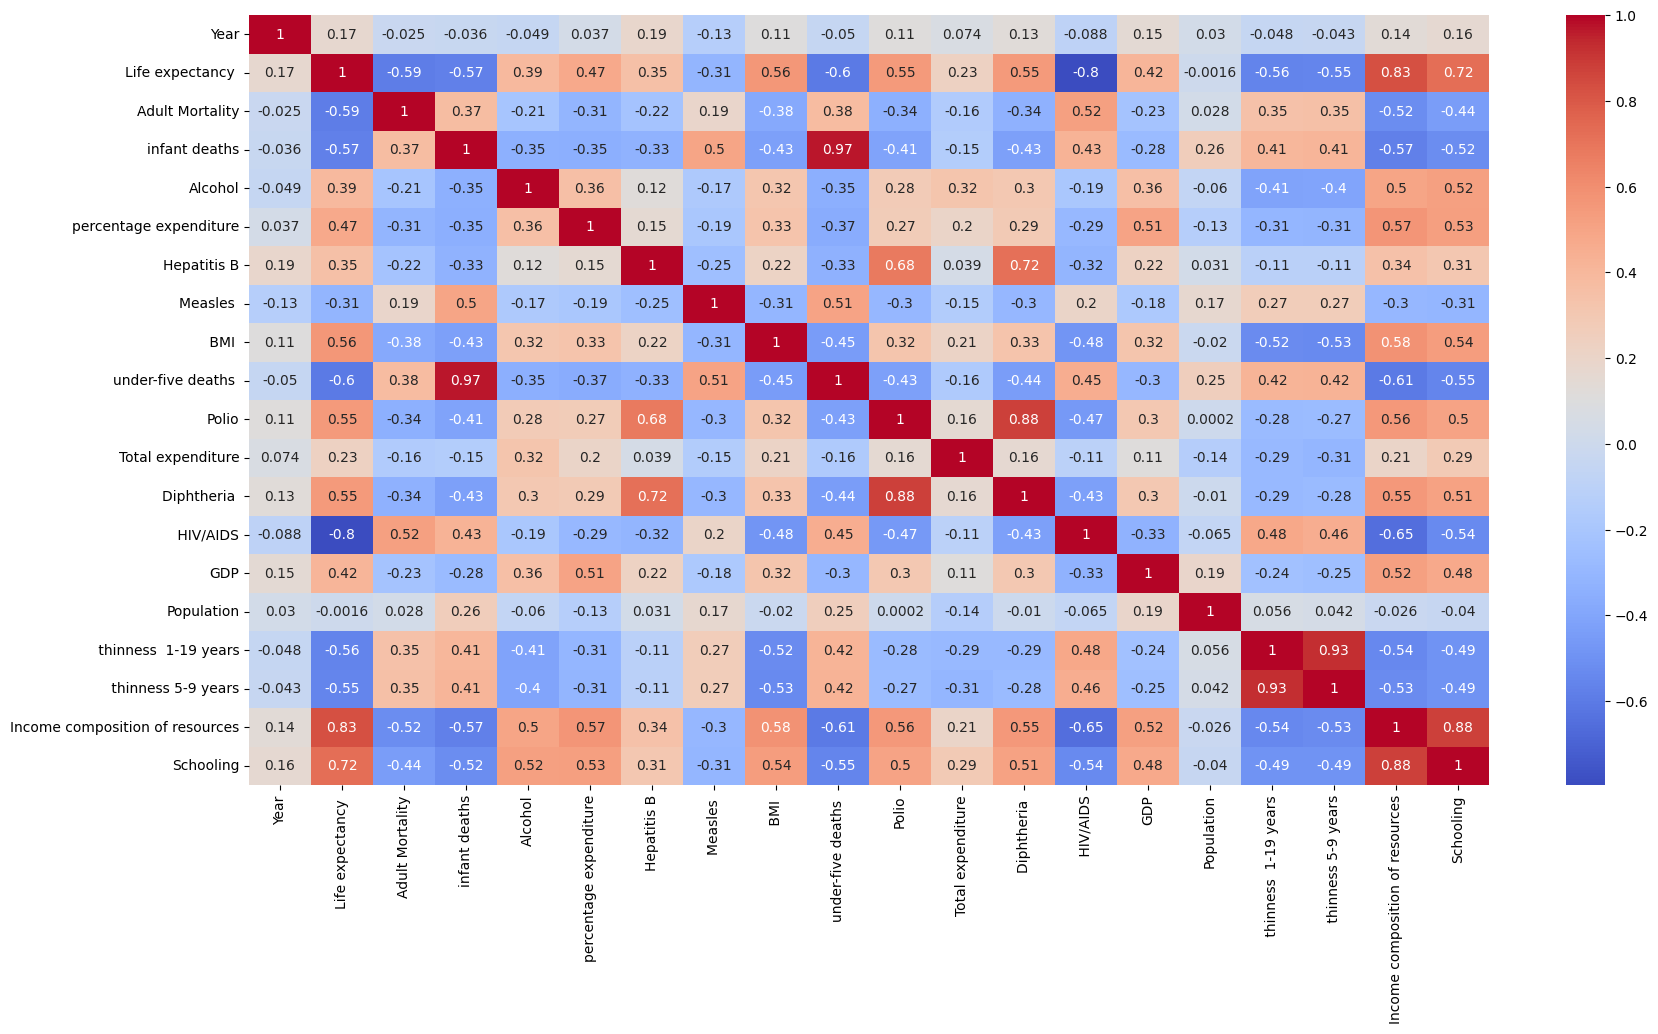

In [73]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Create a correlation matrix for selected numeric columns
print("\nCorrelation heatmap:")
plt.figure(figsize=(20, 10))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.show()

# **<font >Handling Categorical Features (encoding)</font>**



In [74]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [75]:
df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [76]:
# Columns to apply label encoding
cols_to_encode = ['Country', 'Status']

# Apply label encoding to X
label_encoder_df = LabelEncoder()
for col in cols_to_encode:
    df[col] = label_encoder_df.fit_transform(df[col])

In [77]:
df['Country'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  44,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [78]:
df['Status'].unique()

array([1, 0])

In [79]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263.0,30.303948,0.01,71.279624,65.0,2419.59224,...,82.550188,8.16,65.0,0.1,584.259210,1.275338e+07,4.839704,4.870317,0.479,10.1
1,0,2014,1,59.9,271.0,30.303948,0.01,73.523582,62.0,492.00000,...,58.000000,8.18,62.0,0.1,612.696514,3.275820e+05,4.839704,4.870317,0.476,10.0
2,0,2013,1,59.9,268.0,30.303948,0.01,73.219243,64.0,430.00000,...,62.000000,8.13,64.0,0.1,631.744976,1.275338e+07,4.839704,4.870317,0.470,9.9
3,0,2012,1,59.5,272.0,30.303948,0.01,78.184215,67.0,2419.59224,...,67.000000,8.52,67.0,0.1,669.959000,3.696958e+06,4.839704,4.870317,0.463,9.8
4,0,2011,1,59.2,275.0,30.303948,0.01,7.097109,68.0,2419.59224,...,68.000000,7.87,68.0,0.1,63.537231,2.978599e+06,4.839704,4.870317,0.454,9.5


# **<font>Regression</font>**

In [80]:
X = df.drop('Life expectancy ', axis=1)
y = df['Life expectancy ']

In [81]:
X

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,263.000000,30.303948,0.01,71.279624,65.000000,2419.59224,19.1,...,82.550188,8.16,65.0,0.100000,584.259210,1.275338e+07,4.839704,4.870317,0.479,10.1
1,0,2014,1,271.000000,30.303948,0.01,73.523582,62.000000,492.00000,18.6,...,58.000000,8.18,62.0,0.100000,612.696514,3.275820e+05,4.839704,4.870317,0.476,10.0
2,0,2013,1,268.000000,30.303948,0.01,73.219243,64.000000,430.00000,18.1,...,62.000000,8.13,64.0,0.100000,631.744976,1.275338e+07,4.839704,4.870317,0.470,9.9
3,0,2012,1,272.000000,30.303948,0.01,78.184215,67.000000,2419.59224,17.6,...,67.000000,8.52,67.0,0.100000,669.959000,3.696958e+06,4.839704,4.870317,0.463,9.8
4,0,2011,1,275.000000,30.303948,0.01,7.097109,68.000000,2419.59224,17.2,...,68.000000,7.87,68.0,0.100000,63.537231,2.978599e+06,4.839704,4.870317,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,192,2004,1,164.796448,27.000000,4.36,0.000000,68.000000,31.00000,27.1,...,67.000000,7.13,65.0,1.742103,454.366654,1.277751e+07,9.400000,9.400000,0.407,9.2
2934,192,2003,1,164.796448,26.000000,4.06,0.000000,80.940461,2419.59224,26.7,...,82.550188,6.52,68.0,1.742103,453.351155,1.263390e+07,9.800000,9.900000,0.418,9.5
2935,192,2002,1,73.000000,25.000000,4.43,0.000000,73.000000,304.00000,26.3,...,73.000000,6.53,71.0,1.742103,57.348340,1.255250e+05,1.200000,1.300000,0.427,10.0
2936,192,2001,1,164.796448,25.000000,1.72,0.000000,76.000000,529.00000,25.9,...,76.000000,6.16,75.0,1.742103,548.587312,1.236616e+07,1.600000,1.700000,0.427,9.8


# **<font >Data Scaling</font>**

In [82]:
# Columns to scale
cols_to_scale = ['Year', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']

# Apply Robust scaling to the specified columns


scaler = RobustScaler()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
    

In [83]:
X

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,0.875,1,0.826389,1.241089,-0.660040,0.014574,-1.460868,6.669236,-0.651226,...,-0.723180,0.799212,-1.907888,0.000000,-0.366858,0.735942,0.287941,0.294063,-0.839450,-0.555556
1,0,0.750,1,0.881944,1.241089,-0.660040,0.019711,-1.660077,1.318529,-0.664850,...,-2.422177,0.806407,-2.112304,0.000000,-0.362739,-0.271463,0.287941,0.294063,-0.853211,-0.583333
2,0,0.625,1,0.861111,1.241089,-0.660040,0.019014,-1.527271,1.146426,-0.678474,...,-2.145357,0.788421,-1.976027,0.000000,-0.359979,0.735942,0.287941,0.294063,-0.880734,-0.611111
3,0,0.500,1,0.888889,1.241089,-0.660040,0.030380,-1.328062,6.669236,-0.692098,...,-1.799331,0.928709,-1.771610,0.000000,-0.354443,0.001705,0.287941,0.294063,-0.912844,-0.638889
4,0,0.375,1,0.909722,1.241089,-0.660040,-0.132347,-1.261659,6.669236,-0.702997,...,-1.730126,0.694896,-1.703471,0.000000,-0.442296,-0.056535,0.287941,0.294063,-0.954128,-0.722222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,192,-0.500,1,0.144420,1.090909,0.031809,-0.148594,-1.261659,0.038862,-0.433243,...,-1.799331,0.428709,-1.907888,2.345862,-0.385676,0.737899,1.200000,1.200000,-1.169725,-0.805556
2934,192,-0.625,1,0.144420,1.045455,-0.015905,-0.148594,-0.402372,6.669236,-0.444142,...,-0.723180,0.209284,-1.703471,2.345862,-0.385823,0.726256,1.280000,1.300000,-1.119266,-0.722222
2935,192,-0.750,1,-0.493056,1.000000,0.042942,-0.148594,-0.929643,0.796669,-0.455041,...,-1.384101,0.212881,-1.499055,2.345862,-0.443193,-0.287844,-0.440000,-0.420000,-1.077982,-0.583333
2936,192,-0.875,1,0.144420,1.000000,-0.388072,-0.148594,-0.730434,1.421235,-0.465940,...,-1.176486,0.079788,-1.226499,2.345862,-0.372026,0.704549,-0.360000,-0.340000,-1.077982,-0.638889


In [84]:
y=df['Life expectancy ']
x=df.drop('Life expectancy ',axis=1)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((2350, 21), (588, 21))

In [85]:
y_train.shape,y_test.shape

((2350,), (588,))

In [86]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(max_depth= None,
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 200)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)


In [87]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)

In [88]:
print("R2 Score: ",r2)
print("Mean Squared Error: ",mse)
print("Mean Absolute Error: ",mae)


R2 Score:  0.9671460122246898
Mean Squared Error:  2.846314328426754
Mean Absolute Error:  1.0569000908423467
